In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import datetime

In [2]:
df_hr= pd.read_csv("Mtry_CA_hr.csv", names = ("Date Time", "Water Level", "Sigma", "I", "L"), header = 0)

In [3]:
df_hr.tail()

,Date Time,Water Level,Sigma,I,L
2155,2017-02-28 19:00,1.499,0.060,0,0
2156,2017-02-28 20:00,1.462,0.072,0,0
2157,2017-02-28 21:00,1.294,0.061,0,0
2158,2017-02-28 22:00,0.952,0.049,0,0
2159,2017-02-28 23:00,0.576,0.052,0,0


In [4]:
df_hr["Date Time"]= pd.to_datetime(df_hr["Date Time"], format = '%Y %m %d %H:%M:')

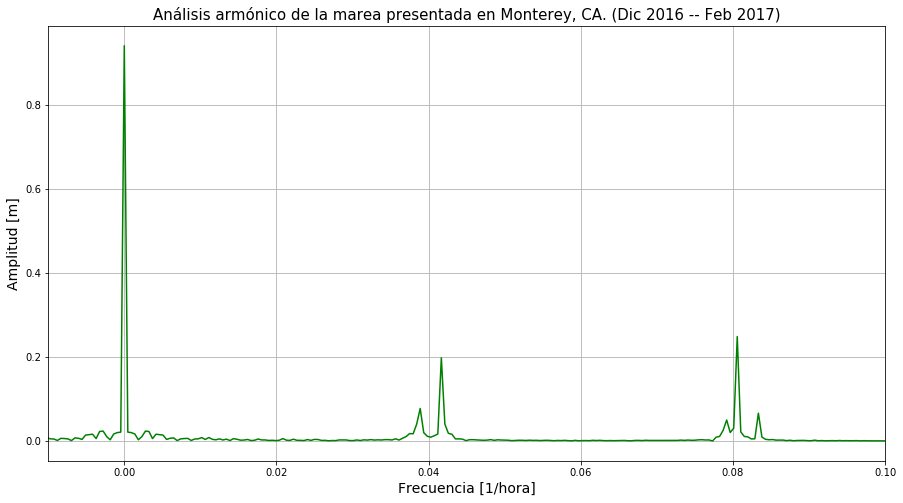

In [5]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N_d = 2160
# sample spacing
T_d = 1.0
x = df_hr["Date Time"]
y_hr = df_hr["Water Level"]
yf_hr = fft(y_hr)
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
yplot_hr = fftshift(yf_hr)
import matplotlib.pyplot as plt
graf = plt.plot(xf_hr, 1.0/N_d *abs(yplot_hr), 'g-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en Monterey, CA. (Dic 2016 -- Feb 2017)', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [6]:
(31*2+28)*24 #es igual numero de datos

2160

In [7]:
a = np.absolute(yf_hr)/N_d #N_d es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier
a

array([ 0.94090185,  0.02114956,  0.02006468, ...,  0.01668225,
        0.02006468,  0.02114956])

In [8]:
print(np.where(a[:,]>0.05))
b= a[a[:,]>0.05]
b

(array([   0,   84,   90,  171,  174,  180, 1980, 1986, 1989, 2070, 2076], dtype=int64),)


array([ 0.94090185,  0.07754764,  0.19804628,  0.05009321,  0.24868601,
        0.06629458,  0.06629458,  0.24868601,  0.05009321,  0.19804628,
        0.07754764])

In [9]:
#Centro de los datos
2160/2

1080.0

In [10]:
#La 0 es la que se encuentra en el origen, pues es la altura media que se presenta para las mareas en Monterey
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf_hr[84,]/N_d))
print('frecuencia=', xf_hr[int(1080 +84),])
print('periodo=', 1/xf_hr[int(1080 +84),])
print()
print('SegundoArmónico notorio')
print('Amplitud=',np.absolute(yf_hr[90,]/N_d))
print('frecuencia=', xf_hr[int(1080 +90),])
print('periodo=', 1/xf_hr[int(1080 +90),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf_hr[171,]/N_d))
print('frecuencia=', xf_hr[int(1080 +171),])
print('periodo=', 1/xf_hr[int(1080 +171),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',np.absolute(yf_hr[174,]/N_d))
print('frecuencia=', xf_hr[int(1080 +174),])
print('periodo=', 1/xf_hr[int(1080 +174),])

print()
print('Quinto armónico notorio')
print('Amplitud=',np.absolute(yf_hr[180,]/N_d))
print('frecuencia=', xf_hr[int(1080 +180),])
print('periodo=', 1/xf_hr[int(1080 +180),])


Primer Armónico notorio
Amplitud= 0.0775476420579
frecuencia= 0.0388888888889
periodo= 25.7142857143

SegundoArmónico notorio
Amplitud= 0.19804628302
frecuencia= 0.0416666666667
periodo= 24.0

Tercer Armónico notorio
Amplitud= 0.0500932081168
frecuencia= 0.0791666666667
periodo= 12.6315789474

Cuarto armónico notorio
Amplitud= 0.248686010099
frecuencia= 0.0805555555556
periodo= 12.4137931034

Quinto armónico notorio
Amplitud= 0.0662945803268
frecuencia= 0.0833333333333
periodo= 12.0


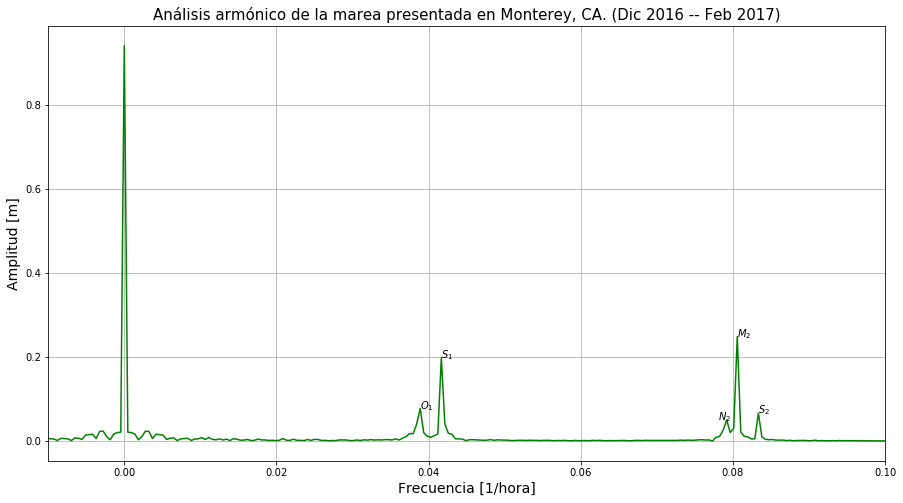

In [11]:
fig = plt.gcf()
fig.set_size_inches(15, 8)


graf = plt.plot(xf_hr, 1.0/N_d *abs(yplot_hr), 'g-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en Monterey, CA. (Dic 2016 -- Feb 2017)', fontsize=15)

plt.text(0.0388888888889, 0.0775476420579, '$O_1$')
plt.text(0.0416666666667, 0.19804628302, '$S_1$')
plt.text(0.078, 0.0500932081168, '$N_2$')
plt.text(0.0805555555556, 0.248686010099, '$M_2$')
plt.text(0.0833333333333, 0.0662945803268, '$S_2$')

plt.show()